In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
holidays = pd.read_csv("./data/store-sales/holidays_events.csv")
oil = pd.read_csv("./data/store-sales/oil.csv")
stores = pd.read_csv("./data/store-sales/stores.csv")
train = pd.read_csv("./data/store-sales/train.csv")
test = pd.read_csv("./data/store-sales/test.csv")
transactions = pd.read_csv("./data/store-sales/transactions.csv")

In [5]:
# Converting date columns to datetime format
for df in [holidays, oil, train, test, transactions]:
    df["date"] = pd.to_datetime(df["date"])

In [6]:
# Merge train datasets
train = train.merge(stores, on="store_nbr", how="left")
train = train.merge(oil, on="date", how="left")
train = train.merge(holidays, on="date", how="left")
train = train.merge(transactions, on=["date", "store_nbr"], how="left")
# Merge test datasets
test = test.merge(stores, on="store_nbr", how="left")
test = test.merge(oil, on="date", how="left")
test = test.merge(holidays, on="date", how="left")
test = test.merge(transactions, on=["date", "store_nbr"], how="left")

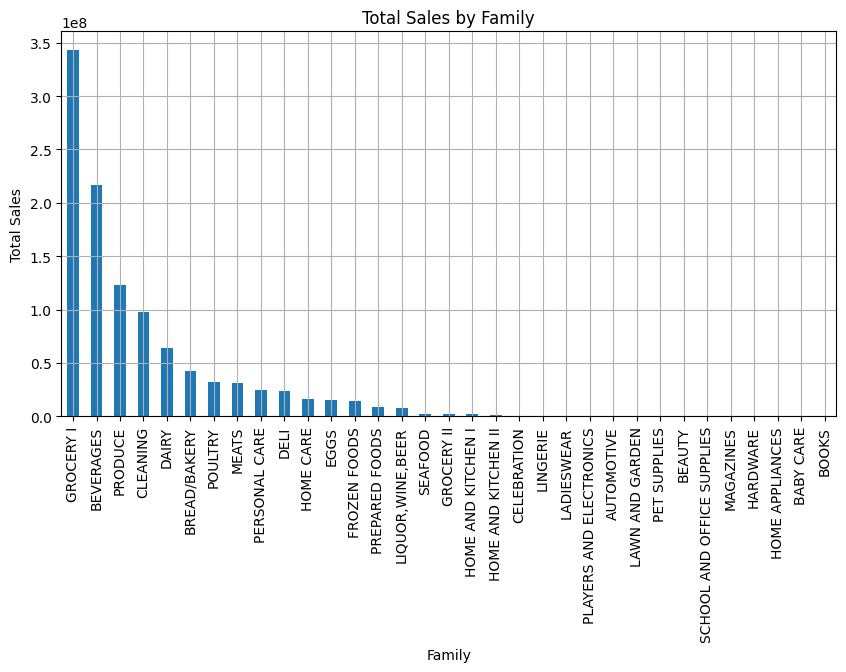

In [12]:
# Sales by family visualization
plt.figure(figsize=(10, 5))
sales_by_family = train.groupby("family")["sales"].sum().sort_values(ascending=False)
sales_by_family.plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Total Sales by Family")
plt.xlabel("Family")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [13]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [10]:
train.get("family").unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)